Выберите категорию:
1 Средняя пенсия
2 Средняя сумма заявки на ипотечный кредит
3 Средняя сумма заявки на потребительский кредит
4 Количество заявок на ипотечные кредиты
5 Средняя зарплата
6 Средний чек в формате Фастфуд
7 Средние траты в ресторане
8 Количество заявок на потребительские кредиты
9 Количество новых депозитов
10 Средняя сумма нового депозита
11 В среднем депозитов в руб. на человека
12 В среднем руб. на текущем счете на человека
13 Средние траты в ресторане фастфуд
14 Средний чек в формате Ресторан
15 Средние расходы по картам
Введите номер: 1
Выберите регион:
1 Московская область
2 Калужская область
3 Республика Калмыкия
4 Ростовская область
5 Удмуртская Республика
6 Липецкая область
7 Республика Мордовия
8 Республика Карачаево-Черкессия
9 Новгородская область
10 Красноярский край
11 Орловская область
12 Ненецкий автономный округ
13 Тамбовская область
14 Владимирская область
15 Кабардино-Балкарская Республика
16 Тульская область
17 Архангельская область
18 Пензенская обл

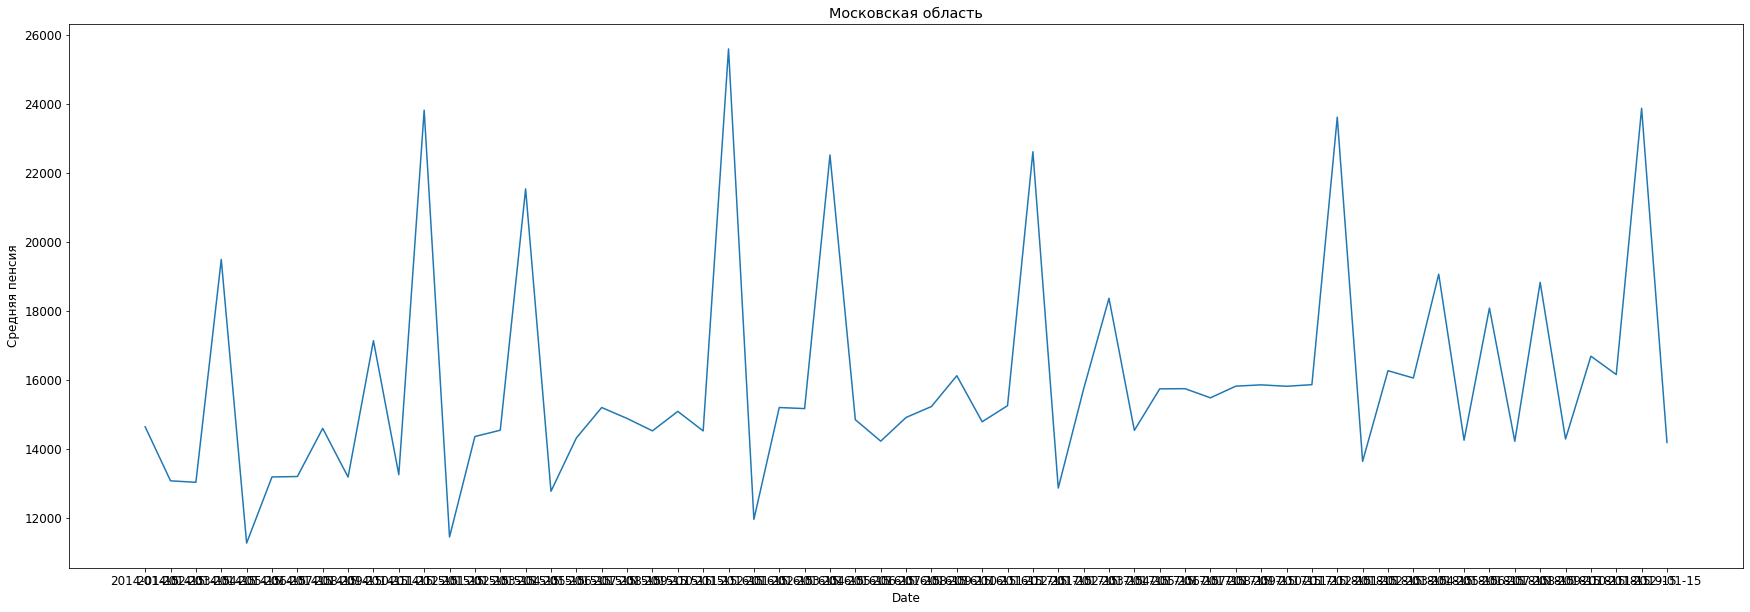

In [16]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 12})

df = pd.read_csv('./opendata.csv',sep=',')

values = list(set(df["name"]))
regions = list(set(df["region"]))


print("Выберите категорию:")

for i in range(len(values)):
    print(i + 1, values[i])

value_choice = 0

while value_choice > len(values) or value_choice <= 0:
    value_choice = int(input("Введите номер: "))

print("Выберите регион:")

for i in range(len(regions)):
    print(i + 1, regions[i])

region_choice = 0

while region_choice > len(regions) or region_choice <= 0:
    region_choice = int(input("Введите номер: "))

value_to_search = values[value_choice-1]
region_to_search = regions[region_choice-1]

df_processed = df.query('name == @value_to_search & region == @region_to_search')

date_min = df_processed["date"].min()
date_max = df_processed["date"].max()

print(f'График будет построен в интервале {date_min} - {date_max}')
date_choice = int(input("Если вы хотите внести изменения - введите 1, если нет - любой другой символ: "))

if date_choice == 1:
    date_min = input("Введите дату для старта интервала в формате yyyy-mm-dd: ")
    date_max = input("Введите дату для окончания интервала в формате yyyy-mm-dd: ")

# решила не добавлять проверку на корректность введенных данных (хотя можно было бы)

plt.figure(figsize=(30,10))
plt.plot(df_processed["date"], df_processed["value"])

plt.title(region_to_search)

plt.xlabel('Date')
plt.ylabel(value_to_search)

plt.show()

